In [1]:
from random import choice

def Barcode(length):
    DNA=""
    for count in range(length):
        DNA+=choice("CGTA")
    return DNA

In [28]:
n_barcodes = [500,1000,5000]
barcode_len = 20
barcodes_N20 = []

for ind,l in enumerate(n_barcodes):
    barcodes_N20_intermediates = []
    for i in range(l):
        barcodes_N20_intermediates.append(Barcode(barcode_len))
    barcodes_N20.append(barcodes_N20_intermediates)

In [2]:
# Weak = A,T
# Strong = C,G

def Barcode_SW(length):
    DNA=""
    for count in range(length):
        DNA+=choice("CG")
        DNA+=choice("AT")
    return DNA

In [30]:
n_barcodes = [500,1000,5000]
barcode_len = 10
barcodes_SW20 = []

for ind,l in enumerate(n_barcodes):
    barcodes_SW20_intermediates = []
    for i in range(l):
        barcodes_SW20_intermediates.append(Barcode_SW(barcode_len))
    barcodes_SW20.append(barcodes_SW20_intermediates)

In [31]:
n_barcodes = [500,1000,5000]
barcode_len = 8
barcodes_SW16 = []

for ind,l in enumerate(n_barcodes):
    barcodes_SW16_intermediates = []
    for i in range(l):
        barcodes_SW16_intermediates.append(Barcode_SW(barcode_len))
    barcodes_SW16.append(barcodes_SW16_intermediates)

In [32]:
# Internal Levenshtein Distance #
import Levenshtein

barcode_libs = [barcodes_N20, barcodes_SW20, barcodes_SW16]
allLib_LDs = []

for a,lib in enumerate(barcode_libs):
    interLibrary_LDs = []
    for n,bc in enumerate(n_barcodes):
#         comparisons = []   
#         lineage_bc1s = []
#         lineage_bc2s = []
        intraLibrary_LDs = []
        for i,mb1 in enumerate(barcode_libs[a][n]):
            intraBarcode_LDs = []
            for j,mb2 in enumerate(barcode_libs[a][n]):
#                 comp = barcode_libs[a][n][i] + "_" + barcode_libs[a][n][j]
#                 comparisons.append(comp)
#                 lineage_bc1 = barcode_libs[a][n][i]
#                 lineage_bc1s.append(lineage_bc1)
#                 lineage_bc2 = barcode_libs[a][n][j]
#                 lineage_bc2s.append(lineage_bc2)
                ld=Levenshtein.distance(mb1,mb2)
                intraBarcode_LDs.append(ld)
            intraLibrary_LDs.append(intraBarcode_LDs)
        interLibrary_LDs.append(intraLibrary_LDs)
    allLib_LDs.append(interLibrary_LDs)
    

In [39]:
barcode_libs[2][1]

['GACTCTCTCAGAGTGT',
 'CAGTCACTGACAGTGT',
 'CAGACTGAGTCTCAGT',
 'GTCTGACTCTCACAGT',
 'CTGTGACTCTGACTCA',
 'CACACACACTGTGTCA',
 'GACTGTCAGTGTGAGA',
 'GACACACTGACAGAGT',
 'CACTCTCACTCTCAGA',
 'GTGAGTGTCTCAGTCA',
 'CTCACAGACACACACT',
 'GACACAGTGTGTGACA',
 'CTCACTCTGACTCTGT',
 'CAGTGAGAGTGAGACA',
 'CAGTCAGACTGTCTCT',
 'CAGAGACTGAGTCAGT',
 'GAGACTGTGAGACTGT',
 'CTGTCACAGAGAGTCT',
 'CTCTGAGTGTGTCACT',
 'GTCAGTCTGACTGAGA',
 'CTGACAGTGTCTGTGA',
 'GTGTCAGTGAGTCAGT',
 'CTGTCTCTGACACAGA',
 'GACTGTCAGTCTGTCA',
 'GACAGACTGAGTGACA',
 'CTGACAGTCTGTCACT',
 'GTGTCTCTGTGTCTGT',
 'GTGAGTCTCTCTGAGA',
 'GACACAGTGAGTGACA',
 'GTCTCTCTGTCTCTCT',
 'CAGTCAGACTGACTGA',
 'CTGACACACTGAGAGA',
 'GTGTCACTCAGTCTCT',
 'GTCACTGTGTCTCTCA',
 'CACAGTCACACTGTGA',
 'CACACAGTCACAGACT',
 'CTGTGTCACAGTGTCA',
 'GACAGTCAGTCTCACA',
 'GTGTCTGACTGACTGT',
 'GAGAGAGACTGTGAGA',
 'CTCACTGACACACTGT',
 'GAGTCTCTCTCACTCT',
 'CTCTGTGTGTCTCAGA',
 'CAGTGTGAGTCACACA',
 'GAGTCTGAGTCTCTCT',
 'CTCAGTGACACAGAGA',
 'CTGTCTGTCACAGACT',
 'GACACTGTCAG

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
# Find nonzero minimum (because commparison to self always yields 1 distance == 0)
import numpy as np

minLDs_all = []
for i,lib in enumerate(allLib_LDs):
    minLDs_lib = []
    for n,bc_len in enumerate(allLib_LDs[i]):
        minLDs_bc = []
        for j, bc in enumerate(allLib_LDs[i][n]):
            lows = np.min([val for ind,val in enumerate(allLib_LDs[i][n][j]) if val != 0])
            minLDs_bc.append(lows)
        minLDs_lib.append(minLDs_bc)
    minLDs_all.append(minLDs_lib)

In [37]:
len(minLDs_all[2][0])

500

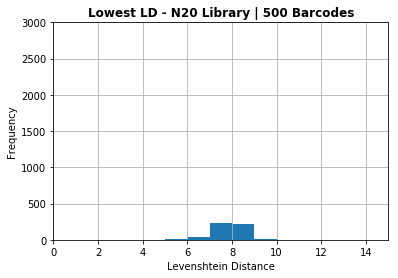

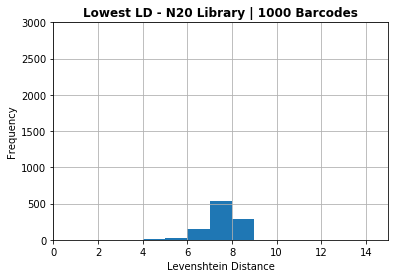

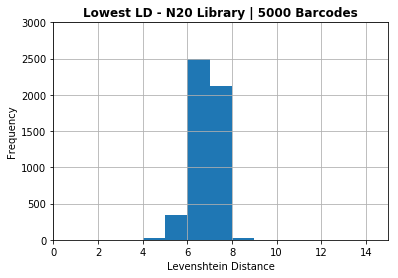

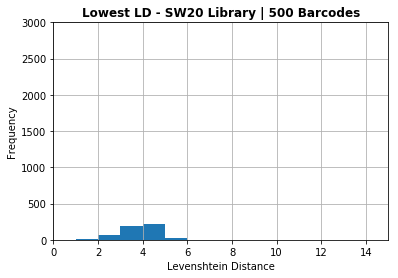

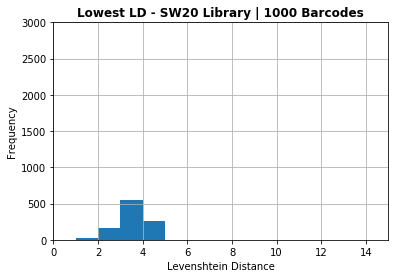

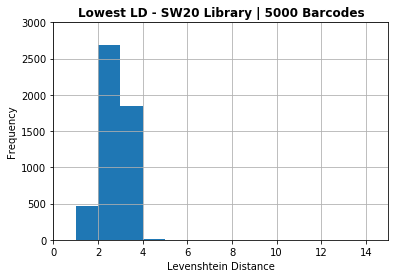

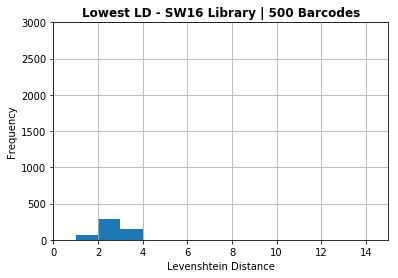

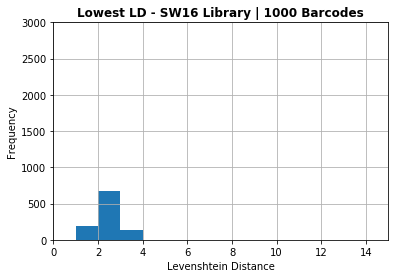

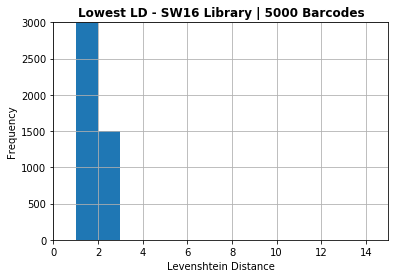

In [46]:
import pandas as pd
bc_libs = ['N20', 'SW20', 'SW16']
max_dist = 15
max_freq = 3000
# bc_df_list = []

for i,lib in enumerate(minLDs_all):
    for n,bc_len in enumerate(minLDs_all[i]):
        bc_df = pd.DataFrame({'Lowest Lev Distance':minLDs_all[i][n],
                                      'Barcode':barcode_libs[i][n]})
        plt.figure()
#         sns.distplot(bc_df['Lowest Lev Distance'])
        bc_df.hist(bins = max_dist, range = (0,max_dist))
        plt.xlabel("Levenshtein Distance")
        plt.ylabel("Frequency")
        plt.xlim(0,max_dist)
        plt.ylim(0,max_freq)
        plt.title("Lowest LD - %s Library | %d Barcodes" % (str(bc_libs[i]), n_barcodes[n]), weight = "bold")
        plt.savefig("LowestLD_simulated_%slibrary_%dbarcodes.pdf" % (str(bc_libs[i]), n_barcodes[n]))
# bc_df_list.append(bc_df)

In [54]:
test1 = Barcode_SW(4)
test2 = Barcode_SW(4)
Levenshtein.distance(test1,test2)

4

In [55]:
test1, test2

('CAGTCAGA', 'CTCAGAGT')

In [20]:
n_barcodes = 1000000
barcode_len = 20
barcodes_N20_1mil = []


for i in range(n_barcodes):
    barcodes_N20_1mil.append(Barcode(barcode_len))

In [11]:
# !pip install distance

    100% |████████████████████████████████| 184kB 2.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for distance ... done
  Stored in directory: /Users/Corey/Library/Caches/pip/wheels/3e/bb/5f/53527bdea6b831a7a101cfa06a08247934255c3a27ce1d8656
Successfully built distance


In [13]:
import distance
import time

def hamming(s1, s2):
    """Calculate the Hamming distance between two bit strings"""
    assert len(s1) == len(s2)
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

time_start = time.time()
a=hamming(barcodes_N20_1mil[0], barcodes_N20_1mil[1])
time_end = time.time() - time_start

time_start1 = time.time()
b=distance.hamming(barcodes_N20_1mil[0], barcodes_N20_1mil[1])
time_end1 = time.time() - time_start1

print(a)
print(time_end)
print(b)
print(time_end1)


16
8.29696655273e-05
16
7.89165496826e-05


In [ ]:
intraLibrary_HDs_N20_1mil = []
for i,mb1 in enumerate(barcodes_N20_1mil):
#     intraBarcode_HDs = []
    for j,mb2 in enumerate(barcodes_N20_1mil):
        hd=distance.hamming(mb1,mb2)
#         intraBarcode_HDs.append(ld)
        intraLibrary_HDs_N20_1mil.append(hd)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

y = pd.Series(intraLibrary_HDs_N20_1mil)

y.tail()
# dims = (12,8)

# fig,ax = plt.subplots(figsize=dims)
# sns.countplot(x = y)
# plt.ylabel("Count")
# plt.title("Hamming Distances between Lineage Barcodes", weight = "bold")
# plt.savefig("HammingDistance_N20_1mil.pdf")

9995    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9996    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9997    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9998    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9999    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
dtype: object

In [5]:
import pandas as pd
x = pd.Series(barcodes_N20_1mil)
x.head()

0    GTCCACAGAAGGCACCCGTA
1    CGCAGGCGATGTGGGTTTAC
2    CGAGCAGAAAGTCTTGAAAG
3    CCGGCTGGCCTCGTCAAATC
4    TGGACACTCTTAACGGACTA
dtype: object

In [4]:
import Levenshtein

intraLibrary_LDs_N20_1mil = []
for i,mb1 in enumerate(barcodes_N20_1mil):
    intraBarcode_LDs = []
    for j,mb2 in enumerate(barcodes_N20_1mil):
        ld=Levenshtein.distance(mb1,mb2)
        intraBarcode_LDs.append(ld)
    intraLibrary_LDs_N20_1mil.append(intraBarcode_LDs)